In [43]:
import pandas as pd
import sqlite3
import os
import statsmodels.api as sm
import pylab as pl
import numpy as np
import statsmodels.formula.api as smf

In [2]:
cwd = os.getcwd()
print(cwd)

/Users/awinecoff/Documents/muscularity


In [3]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
 
    return conn


def select_from_table(conn, table):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    sql_str = "SELECT * FROM {tb}".format(tb=table)
    cur = conn.cursor()
    cur.execute(sql_str)
    names = [description[0] for description in cur.description]

    rows = cur.fetchall()
    
    df = pd.DataFrame(rows, columns =names) 
   
    return df

In [4]:
#conn.close()

In [5]:
data_path = '/Users/awinecoff/Documents/muscularity/data'
os.chdir(data_path)

conn = create_connection('muscularity_sqlite.db')
ht_wt_bmi = select_from_table(conn, 'ht_wt_bmi')
body_decisions = select_from_table(conn, 'body_decisions')
demographics = select_from_table(conn, 'demographics')
demographics = demographics[['subj', 'sport', 'gender', 'age', 'education', 'race']]
conn.close()

In [6]:
demographics.head(5)

,subj,sport,gender,age,education,race
0,1004,Rock climbing,Female,NaN,21,Other
1,4004,Rock climbing,Male,NaN,22,"White, Caucasian"
2,5058,CrossFit,Male,18.0,12,Other
3,4088,Rock climbing,Male,18.0,12,"White, Caucasian"
4,6031,Running,Male,18.0,12,"White, Caucasian"


In [7]:
body_decisions_long=pd.melt(body_decisions,id_vars=['subj'],var_name='body_num', value_name='choice').sort_values(['subj'])
body_decisions_long.head(5)

,subj,body_num,choice
31686,1000,body36,Right
17462,1000,body20,Right
47688,1000,body54,Left
10350,1000,body12,Right
25463,1000,body29,Right


In [8]:
#set up the value level for each of the body choices
body_values_dict = [{'body_num':'body1', 'detail':0,'size':0,'emaciation':0.25}, 
               {'body_num':'body2', 'detail':0,'size':0,'emaciation':0.5}, 
               {'body_num':'body3', 'detail':0,'size':0,'emaciation':0.75}, 
               {'body_num':'body4', 'detail':0,'size':0.25,'emaciation':0}, 
               {'body_num':'body5', 'detail':0,'size':0.25,'emaciation':0.25},
               {'body_num':'body6', 'detail':0,'size':0.25,'emaciation':0.5},
               {'body_num':'body7', 'detail':0,'size':0.25,'emaciation':0.75},
               {'body_num':'body8', 'detail':0,'size':0.5,'emaciation':0},
                {'body_num':'body9', 'detail':0,'size':0.5,'emaciation':0.25},
                {'body_num':'body10', 'detail':0,'size':0.5,'emaciation':0.5},
                {'body_num':'body11', 'detail':0,'size':0.5,'emaciation':0.75},
                {'body_num':'body12', 'detail':0,'size':0.75,'emaciation':0},
                {'body_num':'body13', 'detail':0,'size':0.75,'emaciation':0.25},
                {'body_num':'body14', 'detail':0,'size':0.75,'emaciation':0.5},
                {'body_num':'body15', 'detail':0,'size':0.75,'emaciation':0.75},
                {'body_num':'body16', 'detail':0.25,'size':0,'emaciation':0},
                {'body_num':'body17', 'detail':0.25,'size':0,'emaciation':0.25},
                {'body_num':'body18', 'detail':0.25,'size':0,'emaciation':0.5},
                {'body_num':'body19', 'detail':0.25,'size':0,'emaciation':0.75},
                {'body_num':'body20', 'detail':0.25,'size':0.25,'emaciation':0},
                {'body_num':'body21','detail':0.25,'size':0.25,'emaciation':0.25},
                {'body_num':'body22','detail':0.25,'size':0.25,'emaciation':0.5},
                {'body_num':'body23','detail':0.25,'size':0.25,'emaciation':0.75},
                {'body_num':'body24','detail':0.25,'size':0.5,'emaciation':0},
                {'body_num':'body25','detail':0.25,'size':0.5,'emaciation':0.25},
                {'body_num':'body26','detail':0.25,'size':0.5,'emaciation':0.5},
                {'body_num':'body27','detail':0.25,'size':0.5,'emaciation':0.75},
                {'body_num':'body28','detail':0.25,'size':0.75,'emaciation':0},
                {'body_num':'body29','detail':0.25,'size':0.75,'emaciation':0.25},
                {'body_num':'body30','detail':0.25,'size':0.75,'emaciation':0.5},
                {'body_num':'body31','detail':0.25,'size':0.75,'emaciation':0.75},
                {'body_num':'body32','detail':0.5,'size':0,'emaciation':0},
                {'body_num':'body33','detail':0.5,'size':0,'emaciation':0.25},
                {'body_num':'body34','detail':0.5,'size':0,'emaciation':0.5},
                {'body_num':'body35','detail':0.5,'size':0,'emaciation':0.75},
                {'body_num':'body36','detail':0.5,'size':0.25,'emaciation':0},
                {'body_num':'body37','detail':0.5,'size':0.25,'emaciation':0.25},
                {'body_num':'body38','detail':0.5,'size':0.25,'emaciation':0.5},
                {'body_num':'body39','detail':0.5,'size':0.25,'emaciation':0.75},
                {'body_num':'body40','detail':0.5,'size':0.5,'emaciation':0},
                {'body_num':'body41','detail':0.5,'size':0.5,'emaciation':0.25},
                {'body_num':'body42','detail':0.5,'size':0.5,'emaciation':0.5},
                {'body_num':'body43','detail':0.5,'size':0.5,'emaciation':0.75},
                {'body_num':'body44','detail':0.5,'size':0.75,'emaciation':0},
                {'body_num':'body45','detail':0.5,'size':0.75,'emaciation':0.25},
                {'body_num':'body46','detail':0.5,'size':0.75,'emaciation':0.5},
                {'body_num':'body47','detail':0.5,'size':0.75,'emaciation':0.75},
                {'body_num':'body48','detail':0.75,'size':0,'emaciation':0},
                {'body_num':'body49','detail':0.75,'size':0,'emaciation':0.25},
                {'body_num':'body50','detail':0.75,'size':0,'emaciation':0.5},
                {'body_num':'body51','detail':0.75,'size':0,'emaciation':0.75},
                {'body_num':'body52','detail':0.75,'size':0.25,'emaciation':0},
                {'body_num':'body53','detail':0.75,'size':0.25,'emaciation':0.25},
                {'body_num':'body54','detail':0.75,'size':0.25,'emaciation':0.5},
                {'body_num':'body55','detail':0.75,'size':0.25,'emaciation':0.75},
                {'body_num':'body56','detail':0.75,'size':0.5,'emaciation':0},
                {'body_num':'body57','detail':0.75,'size':0.5,'emaciation':0.25},
                {'body_num':'body58','detail':0.75,'size':0.5,'emaciation':0.5},
                {'body_num':'body59','detail':0.75,'size':0.5,'emaciation':0.75},
                {'body_num':'body60','detail':0.75,'size':0.75,'emaciation':0},
                {'body_num':'body61','detail':0.75,'size':0.75,'emaciation':0.25},
                {'body_num':'body62','detail':0.75,'size':0.75,'emaciation':0.5},
                {'body_num':'body63','detail':0.75,'size':0.75,'emaciation':0.75}]

#print(len(body_values_dict))
stimuli_jpgs = [
'1_BBD0_BBS0_E0.25.jpg',
'2_BBD0_BBS0_E0.5.jpg',
'3_BBD0_BBS0_E0.75.jpg',
'5_BBD0_BBS0.25_E0.jpg',
'6_BBD0_BBS0.25_E0.25.jpg',
'7_BBD0_BBS0.25_E0.5.jpg',
'8_BBD0_BBS0.25_E0.75.jpg',
'10_BBD0_BBS0.5_E0.jpg',
'11_BBD0_BBS0.5_E0.25.jpg',
'12_BBD0_BBS0.5_E0.5.jpg',
'13_BBD0_BBS0.5_E0.75.jpg',
'15_BBD0_BBS0.75_E0.jpg',
'16_BBD0_BBS0.75_E0.25.jpg',
'17_BBD0_BBS0.75_E0.5.jpg',
'18_BBD0_BBS0.75_E0.75.jpg',
'25_BBD0.25_BBS0_E0.jpg',
'26_BBD0.25_BBS0_E0.25.jpg',
'27_BBD0.25_BBS0_E0.5.jpg',
'28_BBD0.25_BBS0_E0.75.jpg',
'30_BBD0.25_BBS0.25_E0.jpg',
'31_BBD0.25_BBS0.25_E0.25.jpg',
'32_BBD0.25_BBS0.25_E0.5.jpg',
'33_BBD0.25_BBS0.25_E0.75.jpg',
'35_BBD0.25_BBS0.5_E0.jpg',
'36_BBD0.25_BBS0.5_E0.25.jpg',
'37_BBD0.25_BBS0.5_E0.5.jpg',
'38_BBD0.25_BBS0.5_E0.75.jpg',
'40_BBD0.25_BBS0.75_E0.jpg',
'41_BBD0.25_BBS0.75_E0.25.jpg',
'42_BBD0.25_BBS0.75_E0.5.jpg',
'43_BBD0.25_BBS0.75_E0.75.jpg',
'50_BBD0.5_BBS0_E0.jpg',
'51_BBD0.5_BBS0_E0.25.jpg',
'52_BBD0.5_BBS0_E0.5.jpg',
'53_BBD0.5_BBS0_E0.75.jpg',
'55_BBD0.5_BBS0.25_E0.jpg',
'56_BBD0.5_BBS0.25_E0.25.jpg',
'57_BBD0.5_BBS0.25_E0.5.jpg',
'58_BBD0.5_BBS0.25_E0.75.jpg',
'60_BBD0.5_BBS0.5_E0.jpg',
'61_BBD0.5_BBS0.5_E0.25.jpg',
'62_BBD0.5_BBS0.5_E0.5.jpg',
'63_BBD0.5_BBS0.5_E0.75.jpg',
'65_BBD0.5_BBS0.75_E0.jpg',
'66_BBD0.5_BBS0.75_E0.25.jpg',
'67_BBD0.5_BBS0.75_E0.5.jpg',
'68_BBD0.5_BBS0.75_E0.75.jpg',
'75_BBD0.75_BBS0_E0.jpg',
'76_BBD0.75_BBS0_E0.25.jpg',
'77_BBD0.75_BBS0_E0.5.jpg',
'78_BBD0.75_BBS0_E0.75.jpg',
'80_BBD0.75_BBS0.25_E0.jpg',
'81_BBD0.75_BBS0.25_E0.25.jpg',
'82_BBD0.75_BBS0.25_E0.5.jpg',
'83_BBD0.75_BBS0.25_E0.75.jpg',
'85_BBD0.75_BBS0.5_E0.jpg',
'86_BBD0.75_BBS0.5_E0.25.jpg',
'87_BBD0.75_BBS0.5_E0.5.jpg',
'88_BBD0.75_BBS0.5_E0.75.jpg',
'90_BBD0.75_BBS0.75_E0.jpg',
'91_BBD0.75_BBS0.75_E0.25.jpg',
'92_BBD0.75_BBS0.75_E0.5.jpg',
'93_BBD0.75_BBS0.75_E0.75.jpg']

#whether the reference image appeared on the Left or the Right side for the trial
ref_side=['Left','Right','Left','Left','Right','Left','Right','Right','Left','Right','Left','Left','Right','Left','Right','Left','Right','Left','Right','Right','Left','Right','Left','Left','Right','Left','Right','Right','Left','Right','Left','Right','Left','Right','Left','Left','Right','Left','Right','Right','Left','Right','Left','Left','Right','Left','Right','Left','Right','Left','Right','Right','Left','Right','Left','Left','Right','Left','Right','Right','Left','Right','Left']


body_values_df = pd.DataFrame(body_values_dict)
body_values_df['test_jpg'] = stimuli_jpgs
body_values_df['ref_side'] = ref_side
body_values_df.head(5)



,body_num,detail,emaciation,size,test_jpg,ref_side
0,body1,0.0,0.25,0.00,1_BBD0_BBS0_E0.25.jpg,Left
1,body2,0.0,0.50,0.00,2_BBD0_BBS0_E0.5.jpg,Right
2,body3,0.0,0.75,0.00,3_BBD0_BBS0_E0.75.jpg,Left
3,body4,0.0,0.00,0.25,5_BBD0_BBS0.25_E0.jpg,Left
4,body5,0.0,0.25,0.25,6_BBD0_BBS0.25_E0.25.jpg,Right


In [9]:
#body_choice_df.head(5)

In [10]:
body_choice_df = pd.merge(body_decisions_long, body_values_df, on='body_num', how='left')
body_choice_df = pd.merge(body_choice_df, demographics, on='subj',how='left')
body_choice_df.head(5)
  
#body_choice_df.head(5)

,subj,body_num,choice,detail,emaciation,size,test_jpg,ref_side,sport,gender,age,education,race
0,1000,body36,Right,0.50,0.00,0.25,55_BBD0.5_BBS0.25_E0.jpg,Left,Rock climbing,Female,29.0,16,"White, Caucasian"
1,1000,body20,Right,0.25,0.00,0.25,30_BBD0.25_BBS0.25_E0.jpg,Right,Rock climbing,Female,29.0,16,"White, Caucasian"
2,1000,body54,Left,0.75,0.50,0.25,82_BBD0.75_BBS0.25_E0.5.jpg,Right,Rock climbing,Female,29.0,16,"White, Caucasian"
3,1000,body12,Right,0.00,0.00,0.75,15_BBD0_BBS0.75_E0.jpg,Left,Rock climbing,Female,29.0,16,"White, Caucasian"
4,1000,body29,Right,0.25,0.25,0.75,41_BBD0.25_BBS0.75_E0.25.jpg,Left,Rock climbing,Female,29.0,16,"White, Caucasian"


In [44]:
body_choice_df['chose_ref'] = [1 if x == y else 0 for x,y in zip(body_choice_df['ref_side'], body_choice_df['choice'])] 

body_choice_df.head(5)

,subj,body_num,choice,detail,emaciation,size,test_jpg,ref_side,sport,gender,age,education,race,chose_ref
0,1000,body36,Right,0.50,0.00,0.25,55_BBD0.5_BBS0.25_E0.jpg,Left,Rock climbing,Female,29.0,16,"White, Caucasian",0
1,1000,body20,Right,0.25,0.00,0.25,30_BBD0.25_BBS0.25_E0.jpg,Right,Rock climbing,Female,29.0,16,"White, Caucasian",1
2,1000,body54,Left,0.75,0.50,0.25,82_BBD0.75_BBS0.25_E0.5.jpg,Right,Rock climbing,Female,29.0,16,"White, Caucasian",0
3,1000,body12,Right,0.00,0.00,0.75,15_BBD0_BBS0.75_E0.jpg,Left,Rock climbing,Female,29.0,16,"White, Caucasian",0
4,1000,body29,Right,0.25,0.25,0.75,41_BBD0.25_BBS0.75_E0.25.jpg,Left,Rock climbing,Female,29.0,16,"White, Caucasian",0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c3fdc18>]],
      dtype=object)

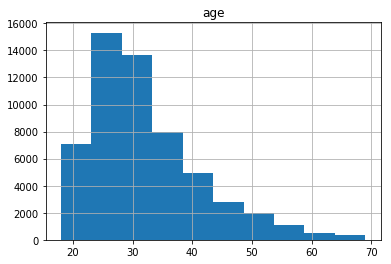

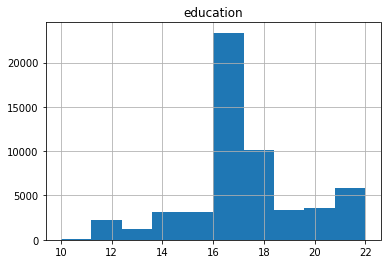

In [15]:
#print(min(body_choice_df["age"]))
body_choice_df.hist('age')
body_choice_df.hist('education')

#pl.show()

In [51]:
#Set up all the dummy coded vars for categorical predictors
#dummy_sport = pd.get_dummies(body_choice_df['sport'], prefix='sport')
#dummy_gender = pd.get_dummies(body_choice_df['gender'], prefix='gender')
#num_cols = ['chose_ref', 'detail', 'emaciation', 'size']
# manually add the intercept


#model_data_all = body_choice_df[num_cols].join(dummy_sport.loc[:, ['sport_CrossFit','sport_Rock climbing']]).join(dummy_gender.loc[:, ['gender_Female']])
#model_data_all['intercept'] = 1.0
#print(len(model_data_all))
#model_data_all = model_data_all.dropna()
model_data_all = body_choice_df.dropna()
#print(len(model_data_all))
model_data_all.head(5)

,subj,body_num,choice,detail,emaciation,size,test_jpg,ref_side,sport,gender,age,education,race,chose_ref
0,1000,body36,Right,0.50,0.00,0.25,55_BBD0.5_BBS0.25_E0.jpg,Left,Rock climbing,Female,29.0,16,"White, Caucasian",0
1,1000,body20,Right,0.25,0.00,0.25,30_BBD0.25_BBS0.25_E0.jpg,Right,Rock climbing,Female,29.0,16,"White, Caucasian",1
2,1000,body54,Left,0.75,0.50,0.25,82_BBD0.75_BBS0.25_E0.5.jpg,Right,Rock climbing,Female,29.0,16,"White, Caucasian",0
3,1000,body12,Right,0.00,0.00,0.75,15_BBD0_BBS0.75_E0.jpg,Left,Rock climbing,Female,29.0,16,"White, Caucasian",0
4,1000,body29,Right,0.25,0.25,0.75,41_BBD0.25_BBS0.75_E0.25.jpg,Left,Rock climbing,Female,29.0,16,"White, Caucasian",0


In [62]:
#feature_cols = model_data_all.columns[1:]
#mod = smf.Logit(formula='chose_ref ~ size + detail + emaciation', data=model_data_all)
#mod =smf.logit(formula = 'chose_ref ~ size + detail + emaciation + age + C(sport)', data = model_data_all)
mod =smf.logit(formula = 'chose_ref ~ C(sport):size + C(sport):detail + C(sport):emaciation + age', data = model_data_all)

#logit = sm.Logit(model_data_all['chose_ref'], model_data_all[feature_cols])
result = mod.fit()

Optimization terminated successfully.
         Current function value: 0.646839
         Iterations 5


In [63]:
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:              chose_ref   No. Observations:                54720
Model:                          Logit   Df Residuals:                    54709
Method:                           MLE   Df Model:                           10
Date:                Fri, 04 Oct 2019   Pseudo R-squ.:                 0.05359
Time:                        14:27:34   Log-Likelihood:                -35395.
converged:                       True   LL-Null:                       -37399.
                                        LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.5792      0.040    -14.631      0.000      -0.657      -0.502
C(sport)[CrossFit]:size               -0.4582      0.052   